# Import Libraries

In [30]:
import os
import numpy 
import pandas 
import sys
import gzip
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# Collect Working Directory

In [6]:
wd = input('Please paste in the desired working directory:')
wd = wd.replace('"','')
os.chdir(wd)

Please paste in the desired working directory: "C:\Users\MSachs.MSACHS-DELL\Documents\GitHub\capstone2022\data"


In [7]:
file = input('Please select the desired file from the list ' + str(os.listdir()) + ' :')
file = file.replace('\'','')
file

Please select the desired file from the list ['SRR7817180_hBM-MSC_3.fastq.gz'] : SRR7817180_hBM-MSC_3.fastq.gz


'SRR7817180_hBM-MSC_3.fastq.gz'

# Import Test File

In [12]:
test_file = gzip.open(file, "rt")
test_file = test_file.read()

In [13]:
print(test_file[0:100])

@HWI-ST1075L:314:C3RTEACXX:8:1101:2032:1996 1:N:0:ACATTGGC
NGTCTTGTTATCGTTCACGCGCCTATCAAAATCTTT
+
#4


## File Reader Function

In [22]:
def read_fastq_to_pandas(filenames, num_records = 50, verbose = True):
    header = []
    sequence = []
    quality = []
    counter = 0 
    stop_count = 0
    stop = num_records * 4
    for filename in filenames:
        f = open(filename, "r")
        lines = f.readlines()
        print("Processing File: {}".format( filename))
        delim = "@"
        if lines[0].startswith("@"):
            delim = lines[0].split(":")[0]
        for i in range(len(lines)):
            line = lines[i]
            if verbose:
                print("\tProcessing Line: {}/{}".format( i +1 ,len(lines)))
            if line.startswith(delim):
                counter = 0
            counter +=1
            if counter == 1:
                header.append(line)
            if counter == 2:
                sequence.append(line)
            if counter == 4:
                quality.append(line)
                
            
            stop_count +=1
            if stop_count == stop: break
    #print(len(header), len(sequence), len(quality))
    dictionary = {'header': header, 'sequence': sequence, 'quality': quality} 
    df = pandas.DataFrame(dictionary)

    df[[
        "instrument_name",
        "run_id", 
        "flowcell_id",
        "flowcell_lane_tile_number",
        "x-coord_within_tile",
        "y-coord_within_tile",
        "member_pair",
        "filtered",
        "control_bits",
        "index_sequence"]] = df["header"].str.split(pat=":", expand=True)
    
    df['instrument_name'] =  df['instrument_name'].apply(lambda x: x[1:] if x.startswith("@") else x)
    df['sequence'] = df['sequence'].apply(lambda x: x.strip())
    df['index_sequence'] = df['index_sequence'].apply(lambda x: x.strip())
    df['filtered'] = df['filtered'].astype('category')
    
    return df
    

## Data Pre-Processing

In [17]:
if os.path.exists("testFile.fq"):
    os.remove("testFile.fq")
f = open("testFile.fq", "a")
f.write(test_file)
f.close()

In [23]:
list_of_files = [x for x in os.listdir(os.getcwd()) if x.endswith(".fq")]
print(list_of_files)
df = read_fastq_to_pandas(list_of_files)   
df.head()

['testFile.fq']
Processing File: testFile.fq
	Processing Line: 1/59918592
	Processing Line: 2/59918592
	Processing Line: 3/59918592
	Processing Line: 4/59918592
	Processing Line: 5/59918592
	Processing Line: 6/59918592
	Processing Line: 7/59918592
	Processing Line: 8/59918592
	Processing Line: 9/59918592
	Processing Line: 10/59918592
	Processing Line: 11/59918592
	Processing Line: 12/59918592
	Processing Line: 13/59918592
	Processing Line: 14/59918592
	Processing Line: 15/59918592
	Processing Line: 16/59918592
	Processing Line: 17/59918592
	Processing Line: 18/59918592
	Processing Line: 19/59918592
	Processing Line: 20/59918592
	Processing Line: 21/59918592
	Processing Line: 22/59918592
	Processing Line: 23/59918592
	Processing Line: 24/59918592
	Processing Line: 25/59918592
	Processing Line: 26/59918592
	Processing Line: 27/59918592
	Processing Line: 28/59918592
	Processing Line: 29/59918592
	Processing Line: 30/59918592
	Processing Line: 31/59918592
	Processing Line: 32/59918592
	Pro

,header,sequence,quality,instrument_name,run_id,flowcell_id,flowcell_lane_tile_number,x-coord_within_tile,y-coord_within_tile,member_pair,filtered,control_bits,index_sequence
0,@HWI-ST1075L:314:C3RTEACXX:8:1101:2032:1996 1:...,NGTCTTGTTATCGTTCACGCGCCTATCAAAATCTTT,#4:DDFFFHHHHHJJJJJJJJJJJIJJIJJJJJJJJ\n,HWI-ST1075L,314,C3RTEACXX,8,1101,2032,1996 1,N,0,ACATTGGC
1,@HWI-ST1075L:314:C3RTEACXX:8:1101:3159:1999 1:...,NTGTATAGCACATACTTCAGGCCTGCGGCACCACCC,#1=DDFFFHHHHHJJJIJJGHJJIJJJJJJJJJJJJ\n,HWI-ST1075L,314,C3RTEACXX,8,1101,3159,1999 1,N,0,ACATTGGC
2,@HWI-ST1075L:314:C3RTEACXX:8:1101:3698:1978 1:...,NTCTCAGTGATAAATACTTCGACAGGACCACTTGAG,#1=DDFFEHHHHHJJJJJJJJJJJJIJJJIJJJJJJ\n,HWI-ST1075L,314,C3RTEACXX,8,1101,3698,1978 1,N,0,ACATTGGC
3,@HWI-ST1075L:314:C3RTEACXX:8:1101:3790:1978 1:...,NCCTGAAGCAACTGCTGTAACTGTGTTACAGTCTGA,#1=BDDFDFHHFDGGGGHIHGGGCFFGGEBCAFFAF\n,HWI-ST1075L,314,C3RTEACXX,8,1101,3790,1978 1,N,0,ACATTGGC
4,@HWI-ST1075L:314:C3RTEACXX:8:1101:3902:1995 1:...,NTACTGTCTTCATTAGCACCATCCGCTCTCGCTTTG,#1=DDFFFHHHHHJJJIJJJIJJJIJJJIIGIJJJJ\n,HWI-ST1075L,314,C3RTEACXX,8,1101,3902,1995 1,N,0,ACATTGGC


## Create N-Grams

In [25]:
# Create function
def generate_N_grams(sequence, maxlen=5, reverse = False):
    
    array = []
    for i in range(len(sequence)- maxlen + 1):
        array.append(sequence[i:i+maxlen])
    
    sequence = sequence[::-1] # Reverse sequence
    
    if reverse:
        for i in range(len(sequence)- maxlen + 1):
            array.append(sequence[i:i+maxlen])
        
    return array

In [26]:
# Run function
reverse_sequence = True
max_length = 8
df['short_sequence'] = df['sequence'].apply(lambda x: generate_N_grams(x,max_length,reverse_sequence ))

In [27]:
# Unstack
lst_col = 'short_sequence'

df = pandas.DataFrame({ col:numpy.repeat(df[col].values, df[lst_col].str.len())
                       for col in df.columns.difference([lst_col])}).assign(**{lst_col:numpy.concatenate(df[lst_col].values)})[df.columns.tolist()]


# Produce Word Clouds

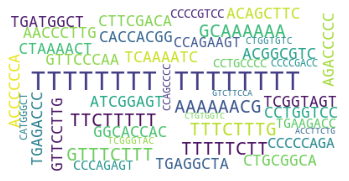

In [45]:
text = ' '.join(str(x) for x in df['short_sequence'])
text = text.strip()
wordcloud = WordCloud(background_color ='white', min_word_length = 4, max_words = 40).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
pandas.DataFrame(df.groupby(['short_sequence'])['short_sequence'].count()).rename(columns = {'short_sequence':'frequency'}).sort_values(
    by = ['frequency'],
    axis = 0, 
    ascending = False, 
).head()

,frequency
short_sequence,
TTTTTTTT,12
GCAAAAAA,3
GTTTCTTT,3
TTTTTCTT,3
TTTCTTTG,3


<AxesSubplot:ylabel='short_sequence'>

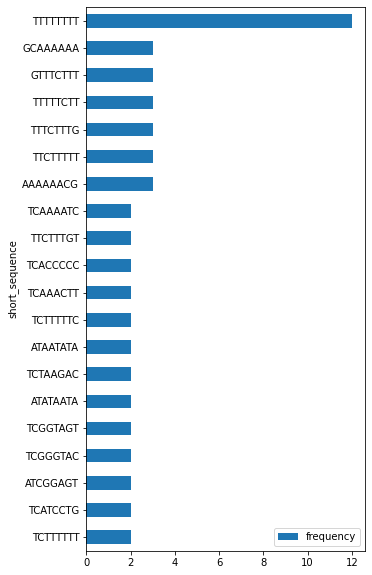

In [48]:
pandas.DataFrame(df.groupby(['short_sequence'])['short_sequence'].count()).rename(columns = {'short_sequence':'frequency'}).sort_values(
    by = ['frequency'],
    axis = 0, 
    ascending = False, 
).head(20).reset_index().sort_values('frequency', ascending=True).plot.barh(y='frequency', x='short_sequence', figsize=(5,10)) 